In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib as matplot

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff # create_table for categorical variables
import cufflinks
cufflinks.go_offline()  
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly.graph_objs as go # graphs on objects
import chart_studio.plotly as py # plotly library

import datetime

## Data Exploratory and Understanding

### Import the original data

In [165]:
df = pd.read_csv('flat_sb_2020.csv',lineterminator='\n',low_memory=False)

In [205]:
ads_df = pd.read_excel('ads_info.xlsx')

In [206]:
ads_df

,brand,time(seconds),rating,youtube views
0,Jeep,60,7.01,49219892
1,Hyundai,60,6.98,41675234
2,Google,90,6.77,15467024
3,Doritos,60,6.62,10860327
4,Rocket Mortgage,60,6.60,7800433
...,...,...,...,...
57,Squarespace,30,4.40,466676
58,Quibi,30,4.40,14764980
59,Michael Bloomberg,60,4.23,6401647
60,Pop-Tards,30,4.10,995860


In [166]:
df.describe()

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,place,...,retweeted_status.quoted_status.place,retweeted_status.quoted_status.contributors,retweeted_status.quoted_status.quote_count,retweeted_status.quoted_status.reply_count,retweeted_status.quoted_status.retweet_count,retweeted_status.quoted_status.favorite_count,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
count,494079.000000,4.940790e+05,4.940790e+05,5.818000e+04,5.818000e+04,8.136000e+04,8.136000e+04,0.0,0.0,0.0,...,0.0,0.0,23715.000000,23715.000000,23715.000000,23715.000000,7.670000e+02,7.670000e+02,1.863000e+03,1.863000e+03
mean,281522.611263,1.224143e+18,1.224143e+18,1.223834e+18,1.223834e+18,2.181581e+17,2.181581e+17,NaN,NaN,NaN,...,NaN,NaN,1010.453637,498.526544,3493.584651,16623.151001,1.211414e+18,1.211414e+18,1.215874e+18,1.215874e+18
std,163585.252349,1.602256e+13,1.602256e+13,7.242075e+15,7.242075e+15,4.124439e+17,4.124439e+17,NaN,NaN,NaN,...,NaN,NaN,2390.237861,1983.446716,5839.301197,25671.982581,9.586781e+16,9.586781e+16,7.856791e+16,7.856791e+16
min,2.000000,1.224113e+18,1.224113e+18,2.627492e+17,2.627492e+17,1.200000e+01,1.200000e+01,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.409060e+17,2.409060e+17,8.783073e+09,8.783073e+09
25%,140303.500000,1.224130e+18,1.224130e+18,1.224123e+18,1.224123e+18,5.689803e+07,5.689803e+07,NaN,NaN,NaN,...,NaN,NaN,37.000000,30.000000,164.000000,509.000000,1.223816e+18,1.223816e+18,1.223962e+18,1.223962e+18
50%,275841.000000,1.224142e+18,1.224142e+18,1.224134e+18,1.224134e+18,4.744472e+08,4.744472e+08,NaN,NaN,NaN,...,NaN,NaN,620.000000,188.000000,2199.000000,9539.000000,1.224046e+18,1.224046e+18,1.224115e+18,1.224115e+18
75%,423165.500000,1.224156e+18,1.224156e+18,1.224149e+18,1.224149e+18,3.901788e+09,3.901788e+09,NaN,NaN,NaN,...,NaN,NaN,620.000000,188.000000,4077.000000,22234.000000,1.224115e+18,1.224115e+18,1.224146e+18,1.224146e+18
max,563274.000000,1.224173e+18,1.224173e+18,1.224173e+18,1.224173e+18,1.224170e+18,1.224170e+18,NaN,NaN,NaN,...,NaN,NaN,109403.000000,36402.000000,139513.000000,547929.000000,1.224168e+18,1.224168e+18,1.224171e+18,1.224171e+18


In [4]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status.extended_tweet.entities.polls,retweeted_status.scopes.followers,quoted_status.entities.polls,retweeted_status.quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.entities.polls,quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.user.withheld_in_countries,retweeted_status.quoted_status.withheld_in_countries,quoted_status.user.withheld_in_countries,quoted_status.withheld_in_countries
0,2,5e37c79ad45e79dd671e47ed,Mon Feb 03 03:28:35 +0000 2020,1224172804100194304,1224172804100194304,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,5e37c79ad45e79dd671e47ec,Mon Feb 03 03:28:44 +0000 2020,1224172844097179654,1224172844097179654,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,5e37c79ad45e79dd671e47e8,Mon Feb 03 03:29:44 +0000 2020,1224173095369486338,1224173095369486338,"RT @BleachImmortal: ""My name is Ichigo Kurosak...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5e37c79ad45e79dd671e47e6,Mon Feb 03 03:29:54 +0000 2020,1224173137698467842,1224173137698467842,"RT @ZBrag101: My Next Video, hav't started yet...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,5e37c79ad45e79dd671e47f0,Mon Feb 03 03:28:29 +0000 2020,1224172779559321600,1224172779559321600,@AubreyNexus @LaudenRolly When I bleach my hai...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# All features
print(df.columns.values)

['Unnamed: 0' '_id' 'created_at' 'id' 'id_str' 'text' 'source' 'truncated'
 'in_reply_to_status_id' 'in_reply_to_status_id_str' 'in_reply_to_user_id'
 'in_reply_to_user_id_str' 'in_reply_to_screen_name' 'geo' 'coordinates'
 'place' 'contributors' 'is_quote_status' 'quote_count' 'reply_count'
 'retweet_count' 'favorite_count' 'favorited' 'retweeted' 'filter_level'
 'lang' 'matching_rules' 'timestamp' 'valid_time' 'period' 'AdTitle'
 'Brand' 'sentiment' 'user.id' 'user.id_str' 'user.name'
 'user.screen_name' 'user.location' 'user.url' 'user.description'
 'user.translator_type' 'user.protected' 'user.verified'
 'user.followers_count' 'user.friends_count' 'user.listed_count'
 'user.favourites_count' 'user.statuses_count' 'user.created_at'
 'user.utc_offset' 'user.time_zone' 'user.geo_enabled' 'user.lang'
 'user.contributors_enabled' 'user.is_translator'
 'user.profile_background_color' 'user.profile_background_image_url'
 'user.profile_background_image_url_https' 'user.profile_background_t

### New dataframe

In [194]:
# Select useful features ( initiation )
Tweet = df[['timestamp','text','valid_time','Brand','sentiment','period','AdTitle','user.description','user.verified','user.followers_count','user.location','retweet_count']]

In [195]:
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494079 entries, 0 to 494078
Data columns (total 12 columns):
timestamp               494079 non-null float64
text                    494079 non-null object
valid_time              494079 non-null bool
Brand                   494079 non-null object
sentiment               494079 non-null object
period                  494079 non-null object
AdTitle                 494079 non-null object
user.description        413893 non-null object
user.verified           494079 non-null bool
user.followers_count    494079 non-null int64
user.location           350830 non-null object
retweet_count           494079 non-null int64
dtypes: bool(2), float64(1), int64(2), object(7)
memory usage: 38.6+ MB


In [196]:
Tweet.head()

,timestamp,text,valid_time,Brand,sentiment,period,AdTitle,user.description,user.verified,user.followers_count,user.location,retweet_count
0,1.580701e+09,RT @theBaeSensei: I’ll drink bleach before i p...,True,NFL,negative,4,Next 100,3 cans short of a 6 pack ... #TeamOnBullshit,False,244,NaN,0
1,1.580701e+09,RT @theBaeSensei: I’ll drink bleach before i p...,True,NFL,negative,4,Next 100,boy momma. 28. 🤞🏽🐻💙 insta @chanelisamazing,False,1236,NaN,0
2,1.580701e+09,"RT @BleachImmortal: ""My name is Ichigo Kurosak...",True,NFL,positive,4,Next 100,Hey everyone! I'm RallyHitzZ | 17 | #Anime | E...,False,159,Soul Society,0
3,1.580701e+09,"RT @ZBrag101: My Next Video, hav't started yet...",True,NFL,negative,4,Next 100,My advice to the world: Normalcy is overrated....,False,561,"Fort Wayne, IN",0
4,1.580701e+09,@AubreyNexus @LaudenRolly When I bleach my hai...,True,NFL,neutral,4,Next 100,20 | TN | Cosplayer | Hero Enthusiast\n\nNext ...,False,11,"Murfreesboro, TN",1


In [242]:
Tweet[Tweet['user.location']=='Brazil']

,timestamp,text,valid_time,Brand,sentiment,period,AdTitle,user.description,user.verified,user.followers_count,user.location,retweet_count
5921,2020-02-02 23:33:28,@backstreetboys @chancetherapper @Doritos Haha...,True,Doritos,positive,1,The Cool Ranch,"Artesã, designer de interiores, echelon e aman...",False,357,Brazil,0
5940,2020-02-02 23:32:49,RT @backstreetboys: Throwback to last year’s #...,True,Doritos,positive,1,The Cool Ranch,"Artesã, designer de interiores, echelon e aman...",False,357,Brazil,0
6077,2020-02-03 03:12:38,RT @tide: Saving the world (again) &gt; laundr...,True,Tide,neutral,4,Finally Later,I love meeting new worlds reading books and pl...,False,956,Brazil,0
6660,2020-02-03 02:14:05,RT @tide: Saving the world (again) &gt; laundr...,True,Tide,neutral,3,Finally Later,NaN,False,483,Brazil,0
9096,2020-02-03 03:12:38,RT @tide: Saving the world (again) &gt; laundr...,True,Tide,neutral,4,Finally Later,I love meeting new worlds reading books and pl...,False,956,Brazil,0
...,...,...,...,...,...,...,...,...,...,...,...,...
434458,2020-02-03 00:24:43,RT @ComicBook: Chris Evans in this Hyundai Son...,True,Cheetos,positive,2,Can't Touch This,"🎶Been through some bad shit, I should be a sad...",False,153,Brazil,0
464434,2020-02-03 01:35:53,RT @007: The 25th Bond film will change everyt...,True,Metro Goldwyn Mayer,neutral,half-time,Trailer: No Time To Die,"""My demons though quiet, are never quite silen...",False,629,Brazil,0
466117,2020-02-03 00:53:53,RT @007: The 25th Bond film will change everyt...,True,Metro Goldwyn Mayer,neutral,2,Trailer: No Time To Die,"🎶Been through some bad shit, I should be a sad...",False,153,Brazil,0
487904,2020-02-03 01:35:53,RT @007: The 25th Bond film will change everyt...,True,Metro Goldwyn Mayer,neutral,half-time,Trailer: No Time To Die,"""My demons though quiet, are never quite silen...",False,629,Brazil,0


In [231]:
ls = Tweet.groupby('user.location').count().sort_values(by='user.verified').tail(15000)['timestamp']

In [232]:
def Convert(a): 
    it = iter(lst) 
    res_dct = dict(zip(it, it)) 
    return res_dct 
          
Convert(ls)



NameError: name 'lst' is not defined

## Data Preprocessing

In [236]:
Tweet.timestamp=pd.to_datetime(Tweet.timestamp,unit ='s')

## Sentiment 

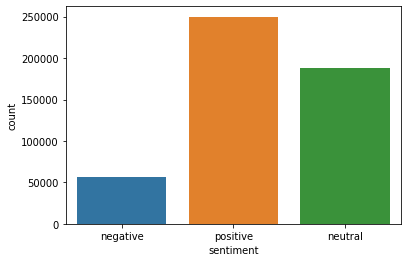

In [237]:
sns.countplot('sentiment',data= Tweet)

## Brand Count

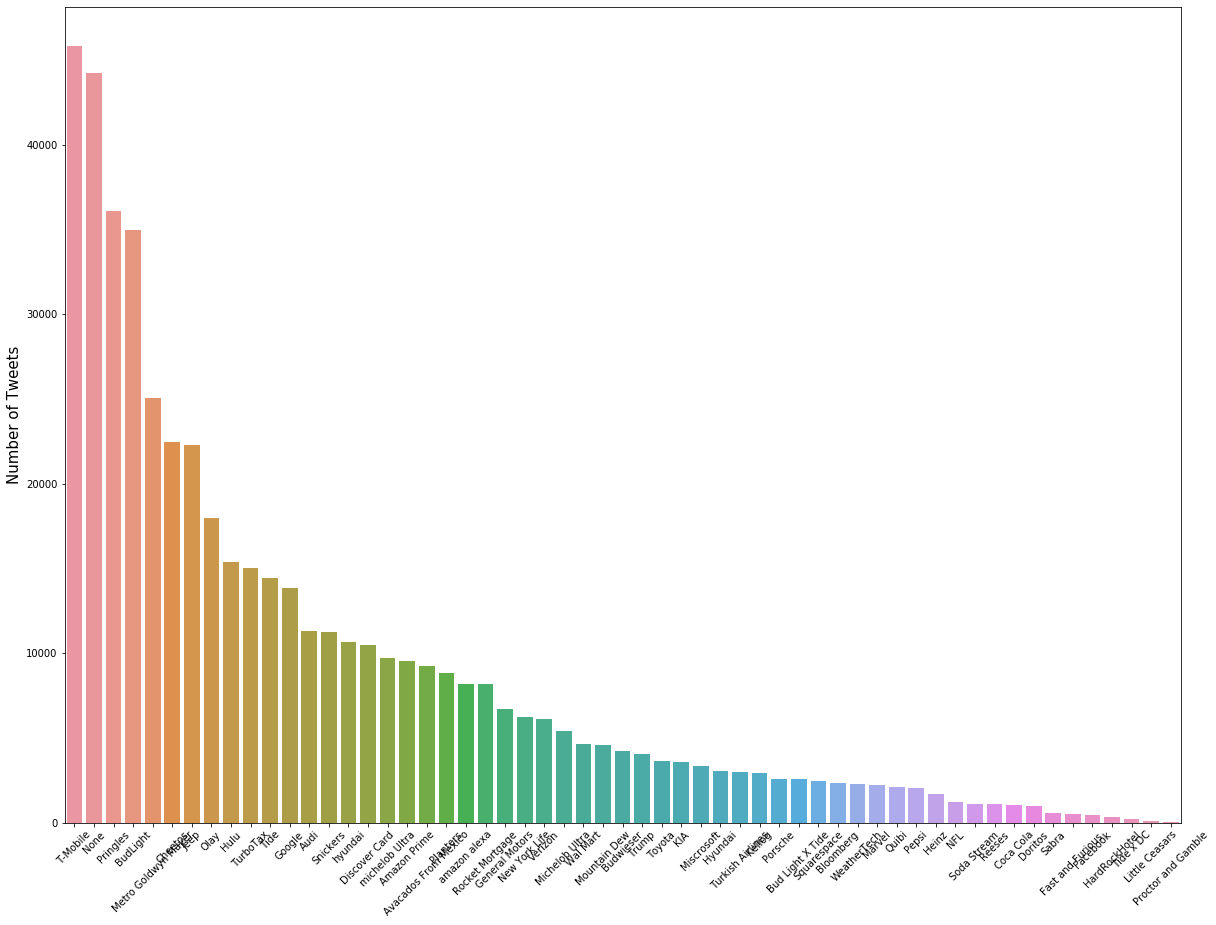

In [176]:
Brand_count=Tweet['Brand'].value_counts()
fig, ax = plt.subplots(figsize=(20,15))
bar = sns.barplot(Brand_count.index,Brand_count.values)

plt.xticks(rotation=45)
plt.ylabel('Number of Tweets',fontsize=15)
plt.show()

## word cloud

In [250]:
# pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
negat_tw=Tweet[Tweet['sentiment']=='negative']
words = ' '.join(negat_tw['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [109]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

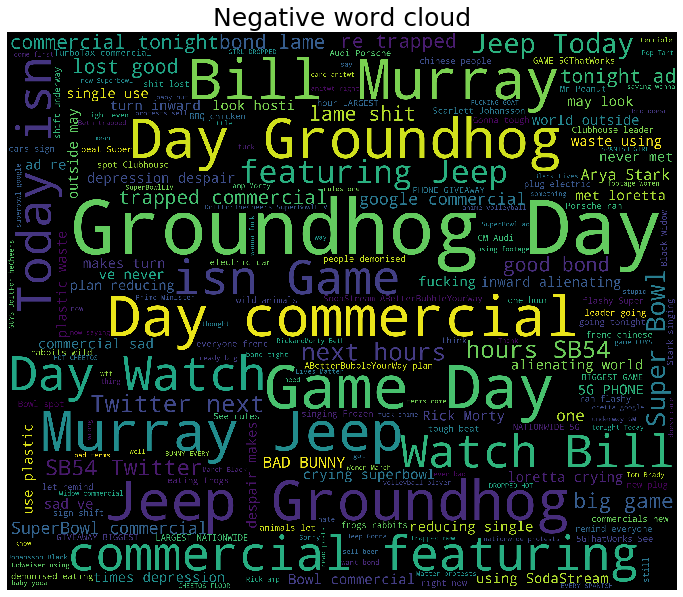

In [113]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative word cloud',fontsize=25)
plt.show()

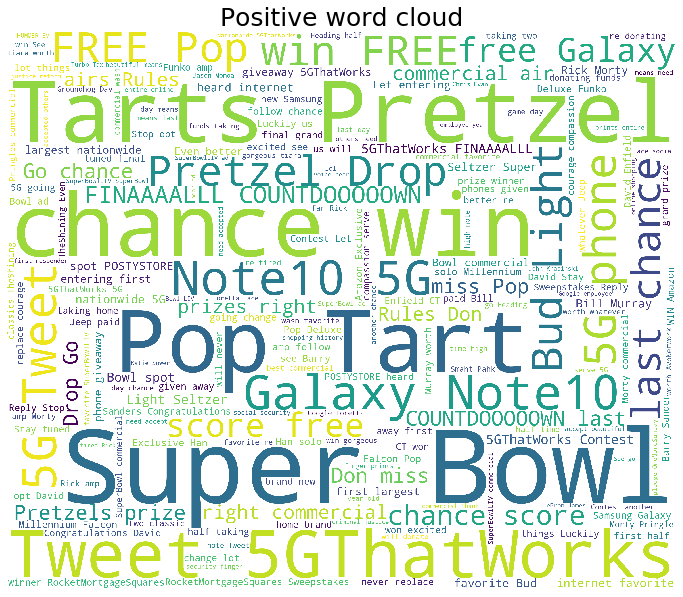

In [114]:

pos_tw=Tweet[Tweet['sentiment']=='positive']
pos_words = ' '.join(pos_tw['text'])
cleaned_word = " ".join([word for word in pos_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.title('Positive word cloud',fontsize=25)
plt.axis('off')
plt.show()

## Data Visualization

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
fig.add_trace(go.Scatter(x=Tweet.timestamp, y=Tweet[Tweet['Brand']=='NFL']['user.followers_count'], name="NFL's followers",
                         line_color='deepskyblue'))

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
fig.show()